#MuscleHub AB Test

The main purpose of this project is to help MuscleHub (a fictional fancy gym) analyze an A/B test and choose a business strategy. Currently, when a visitor to MuscleHub is considering buying a membership, he or she follows the following steps:

- Take a fitness test with a personal trainer
- Fill out an application for the gym
- Send in their payment for their first month’s membership
Janet, the manager of MuscleHub, thinks that the fitness test intimidates some prospective members, so she has set up an A/B test. Visitors will randomly be assigned to one of two groups: Group A will still be asked to take a fitness test with a personal trainer Group B will skip the fitness test and proceed directly to the application

Janet’s hypothesis is that visitors assigned to Group B will be more likely to eventually purchase a membership to MuscleHub.

Like most businesses, Janet keeps her data in a SQL database. For this project, we'll be using a special Codecademy library that lets us type SQL queries directly into this Jupyter notebook. We'll pass each SQL query as an argument to a function called sql_query. Each query returns a Pandas DataFrame.

In [2]:
from codecademySQL import sql_query

Janet of MuscleHub has a SQLite database, which contains several tables that will be helpful to you in this investigation:
- `visits` contains information about potential gym customers who have visited MuscleHub
- `fitness_tests` contains information about potential customers in "Group A", who were given a fitness test
- `applications` contains information about any potential customers (both "Group A" and "Group B") who filled out an application.  Not everyone in `visits` will have filled out an application.
- `purchases` contains information about customers who purchased a membership to MuscleHub.


In [4]:
#Let's examine visits first
sql_query('''
SELECT * FROM visits
LIMIT 5
''')

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [5]:
# Examine fitness_tests
sql_query('''
SELECT * FROM fitness_tests
LIMIT 5
''')

,index,first_name,last_name,email,gender,fitness_test_date
0,0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


In [6]:
# Examine applications
sql_query('''
SELECT * FROM applications
LIMIT 5
''')

,index,first_name,last_name,email,gender,application_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


In [34]:
# Examine purchases
sql_query('''
SELECT * FROM purchases
LIMIT 6
''')

,index,first_name,last_name,email,gender,purchase_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24
5,5,Ray,Adkins,RAdkins1997@gmail.com,male,2017-08-13


Now we need to download a DataFrame containing all of this data.  We'll need to write a query that does the following things:

1. Pull data where `visit_date` is on or after `7-1-17`.

2. Perform a series of `LEFT JOIN` commands to combine the four tables that we care about.  We'll need to perform the joins on `first_name`, `last_name`, and `email`.  Let's pull the following columns and save the result of this query to a variable called `df`.

- `visits.first_name`
- `visits.last_name`
- `visits.gender`
- `visits.email`
- `visits.visit_date`
- `fitness_tests.fitness_test_date`
- `applications.application_date`
- `purchases.purchase_date`

In [9]:
df = sql_query('''
SELECT visits.first_name,
       visits.last_name,
       visits.visit_date,
       fitness_tests.fitness_test_date,
       applications.application_date,
       purchases.purchase_date
FROM visits
LEFT JOIN fitness_tests
    ON fitness_tests.first_name = visits.first_name
    AND fitness_tests.last_name = visits.last_name
    AND fitness_tests.email = visits.email
LEFT JOIN applications
    ON applications.first_name = visits.first_name
    AND applications.last_name = visits.last_name
    AND applications.email = visits.email
LEFT JOIN purchases
    ON purchases.first_name = visits.first_name
    AND purchases.last_name = visits.last_name
    AND purchases.email = visits.email
WHERE visits.visit_date >= '7-1-17'
''')
df

,first_name,last_name,visit_date,fitness_test_date,application_date,purchase_date
0,Kim,Walter,7-1-17,2017-07-03,None,None
1,Tom,Webster,7-1-17,2017-07-02,None,None
2,Edward,Bowen,7-1-17,None,2017-07-04,2017-07-04
3,Marcus,Bauer,7-1-17,2017-07-01,2017-07-03,2017-07-05
4,Roberta,Best,7-1-17,2017-07-02,None,None
...,...,...,...,...,...,...
4999,Rachel,Hensley,9-9-17,None,None,None
5000,Leon,Harmon,9-9-17,2017-09-15,None,None
5001,Andy,Pratt,9-9-17,2017-09-15,None,None
5002,Ruben,Nielsen,9-9-17,None,2017-09-13,None


#### - Investigate the A and B groups

In [11]:
import pandas as pd
from matplotlib import pyplot as plt


We're going to add some columns to `df` to help us with our analysis, starting by adding a column called `ab_test_group`. It should be `A` if `fitness_test_date` is not `None`, and `B` if `fitness_test_date` is `None`.

In [12]:
df['ab_test_group'] = df.fitness_test_date.apply(lambda x: 'A' if pd.notnull(x)
                                                else 'B')

df.head()

,first_name,last_name,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group
0,Kim,Walter,7-1-17,2017-07-03,None,None,A
1,Tom,Webster,7-1-17,2017-07-02,None,None,A
2,Edward,Bowen,7-1-17,None,2017-07-04,2017-07-04,B
3,Marcus,Bauer,7-1-17,2017-07-01,2017-07-03,2017-07-05,A
4,Roberta,Best,7-1-17,2017-07-02,None,None,A


Let's do a quick sanity check that Janet split her visitors such that about half are in A and half are in B.

In [13]:
ab_counts = df.groupby('ab_test_group').first_name.count().reset_index()
ab_counts

,ab_test_group,first_name
0,A,2504
1,B,2500


Let's visualise this using a pie chart:

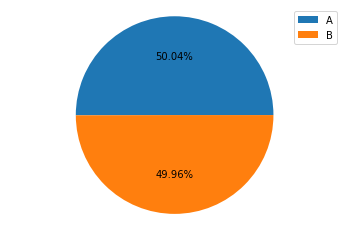

<Figure size 432x288 with 0 Axes>

In [56]:
names = ['A', 'B']
plt.pie(ab_counts.first_name.values, autopct = '%0.2f%%')
plt.axis('equal')
plt.legend(names)
plt.show()
plt.savefig('ab_test_pie_chart.png')

#### --Who picks up an application?

We know that hte process for MuscleHub has several steps:
1. Take a fitness test with a personal trainer (only Group A)
2. Fill out an application for the gym
3. Send in their payment for their first month's membership

Let's examine how many people make it to Step 2, filling out an application.

In [16]:
df['is_application'] = df.application_date.apply(lambda x: 'Application' if pd.notnull(x) else 'No Application')

Now we'll count how many people from Group A and Group B either do or don't pick up an application.

In [17]:
app_counts = df.groupby(['ab_test_group', 'is_application']).first_name.count().reset_index()
app_counts

,ab_test_group,is_application,first_name
0,A,Application,250
1,A,No Application,2254
2,B,Application,325
3,B,No Application,2175


We're going to want to calculate the percent of people in each group who complete an application.  It's going to be much easier to do this if we pivot `app_counts`:

In [18]:
app_pivot = app_counts.pivot(columns = 'is_application',\
                            index = 'ab_test_group',\
                            values = 'first_name').reset_index()
app_pivot

is_application,ab_test_group,Application,No Application
0,A,250,2254
1,B,325,2175


In [19]:
app_pivot['Total'] = app_pivot['Application']+app_pivot['No Application']


In [20]:
app_pivot['Percent with Application'] = app_pivot['Application']/app_pivot['Total']*100
app_pivot

is_application,ab_test_group,Application,No Application,Total,Percent with Application
0,A,250,2254,2504,9.984026
1,B,325,2175,2500,13.000000


It looks like more people from Group B turned in an application but we need to know if this difference is statistically significant. A Chi Square test can help us with that. 


In [26]:
from scipy.stats import chi2_contingency

x = [[250, 2254],
    [325, 2175]]

chi2, pval, dof, expected = chi2_contingency(x)
print('P-value is '+ str(pval))
print('and it is significant ') if pval <= 0.05 else print('and it is not significant')

P-value is 0.0009647827600722304
and it is significant 


##### Who purchases a membership?

Of those who picked up an application, how many purchased a membership?


In [27]:
df['is_member'] = df.purchase_date.apply(lambda x: 'Member' if pd.notnull(x)
                                        else 'Not Member')

Now, let's create a DataFrame called `just_apps` the contains only people who picked up an application.

In [28]:
just_apps = df[df.is_application == 'Application']

just_apps

,first_name,last_name,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
2,Edward,Bowen,7-1-17,None,2017-07-04,2017-07-04,B,Application,Member
3,Marcus,Bauer,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Application,Member
9,Salvador,Cardenas,7-1-17,2017-07-07,2017-07-06,None,A,Application,Not Member
11,Valerie,Munoz,7-1-17,2017-07-03,2017-07-05,2017-07-06,A,Application,Member
35,Michael,Burks,7-1-17,None,2017-07-07,2017-07-13,B,Application,Member
...,...,...,...,...,...,...,...,...,...
4944,Frances,Kerr,9-8-17,2017-09-12,2017-09-10,2017-09-15,A,Application,Member
4964,Raymond,Cantrell,9-9-17,None,2017-09-13,2017-09-18,B,Application,Member
4972,Roberta,Acevedo,9-9-17,None,2017-09-15,2017-09-16,B,Application,Member
4991,Suzanne,Humphrey,9-9-17,2017-09-09,2017-09-13,2017-09-18,A,Application,Member


In the next step let's do a `groupby` to find out how many people in `just_apps` are and aren't members from each group and then pivot the data.


In [29]:
group_memb = just_apps.groupby(['is_member', 'ab_test_group']).first_name.count().reset_index()

member_pivot = group_memb.pivot(columns = 'is_member',\
                            index = 'ab_test_group',\
                            values = 'first_name').reset_index()
member_pivot

is_member,ab_test_group,Member,Not Member
0,A,200,50
1,B,250,75


In [30]:
member_pivot['Total'] = member_pivot.Member + member_pivot['Not Member'] 
member_pivot['Percent Purchase'] = member_pivot.Member/member_pivot.Total *100

In [31]:
member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,50,250,80.000000
1,B,250,75,325,76.923077


It looks like people who took the fitness test were more likely to purchase a membership **if** they picked up an application.  Why might that be?
Just like before, we need to know if this difference is statistically significant. Let's perform a Chi Square test to find out if the p-value is significant or not. 

In [112]:
contingency = [[200, 50], [250, 75]]
chi2_contingency(contingency)

(0.615869230769231,
 0.43258646051083327,
 1,
 array([[195.65217391,  54.34782609],
        [254.34782609,  70.65217391]]))

P-value is 0.4 so we cannot say for sure that picking up an application had any impact on the membership purchase.

Previously, we looked at what percent of people **who picked up applications** purchased memberships.  What we really care about is what percentage of **all visitors** purchased memberships. Let's find that out and pivot the data for a better approach.   

In [32]:
final_member_count = df.groupby(['is_member', 'ab_test_group']).first_name.count().reset_index()

final_member_pivot = final_member_count.pivot(columns = 'is_member',\
                                             index = 'ab_test_group',\
                                             values = 'first_name').reset_index()

final_member_pivot['Total'] = final_member_pivot.Member + final_member_pivot['Not Member']
final_member_pivot['Percent Purchase'] = final_member_pivot.Member/final_member_pivot.Total * 100

final_member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,2304,2504,7.98722
1,B,250,2250,2500,10.00000


Previously, when we only considered people who had **already picked up an application**, we saw that there was no significant difference in membership between Group A and Group B.

Now, when we consider all people who **visit MuscleHub**, we see that there might be a significant different in memberships between Group A and Group B.  Perform a significance test and check.

In [33]:
contingency = [[200, 2304], [250, 2250]]

chi2_contingency(contingency)

(5.949182292591156,
 0.014724114645783203,
 1,
 array([[ 225.17985612, 2278.82014388],
        [ 224.82014388, 2275.17985612]]))

P-value is 0.0147

##### Summarize the acquisition funel with a chart

We'd like to make a bar chart for Janet that shows the difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test) at each state of the process:
- Percent of visitors who apply
- Percent of applicants who purchase a membership
- Percent of visitors who purchase a membership

In order to do that we will create one plot for **each** of the three sets of percentages that we calculated in `app_pivot`, `member_pivot` and `final_member_pivot`.

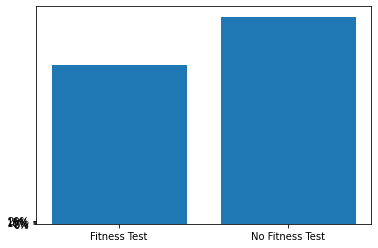

<Figure size 432x288 with 0 Axes>

In [124]:
# Percent of Visitors who Apply
ax = plt.subplot()
plt.bar(range(len(app_pivot)),
       app_pivot['Percent with Application'].values)
ax.set_xticks(range(len(app_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
plt.show()
plt.savefig('percent_visitors_apply.png')

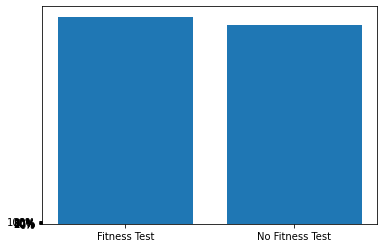

<Figure size 432x288 with 0 Axes>

In [123]:
# Percent of Applicants who Purchase
ax = plt.subplot()
plt.bar(range(len(member_pivot)),
       member_pivot['Percent Purchase'].values)
ax.set_xticks(range(len(app_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.show()
plt.savefig('percent_apply_purchase.png')

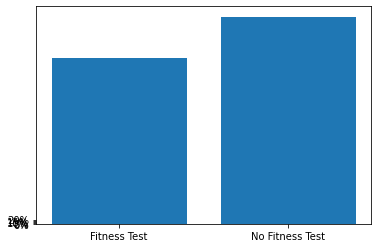

<Figure size 432x288 with 0 Axes>

In [122]:
# Percent of Visitors who Purchase
ax = plt.subplot()
plt.bar(range(len(final_member_pivot)),
       final_member_pivot['Percent Purchase'].values)
ax.set_xticks(range(len(app_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
plt.show()
plt.savefig('percent_visitors_purchase.png')